## Task:1 BIG DATA ANALYSIS

# 1.1- Perform analysis on a large dataset using tools like PySpark or Dask to demonstrate scalability.

In [ ]:
%pip install pyspark dask[complete]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 32.6 MB/s eta 0:00:00


In [ ]:
# Initialize SparkSession and load the dataset using PySpark. Display the schema and a few rows to verify the loading.

from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("LargeDatasetAnalysis").getOrCreate()

# Assuming the large dataset is a CSV file named 'large_dataset.csv' in the current directory
# Replace with the actual path to your dataset
try:
    spark_df = spark.read.csv('large_dataset.csv', header=True, inferSchema=True)
    spark_df.printSchema()
    spark_df.show()
except Exception as e:
    print(f"Error loading data: {e}")
    spark_df = None


Error loading data: [PATH_NOT_FOUND] Path does not exist: file:/content/large_dataset.csv.


In [ ]:
#Since the file was not found, I will try to create a dummy large CSV file to demonstrate the data loading process with PySpark.

import pandas as pd
import numpy as np

# Create a large dummy dataset
data_size = 1000000
dummy_data = pd.DataFrame({
    'col1': np.random.rand(data_size),
    'col2': np.random.randint(0, 100, data_size),
    'col3': [f'category_{i % 5}' for i in range(data_size)]
})

# Save the dummy dataset to a CSV file
dummy_data.to_csv('large_dataset.csv', index=False)

print("Dummy large dataset created successfully.")

Dummy large dataset created successfully.


In [ ]:
# Load the large dataset using PySpark
try:
    spark_df = spark.read.csv('large_dataset.csv', header=True, inferSchema=True)
    spark_df.printSchema()
    spark_df.show()
except Exception as e:
    print(f"Error loading data: {e}")
    spark_df = None

root
 |-- col1: double (nullable = true)
 |-- col2: integer (nullable = true)
 |-- col3: string (nullable = true)

+--------------------+----+----------+
|                col1|col2|      col3|
+--------------------+----+----------+
|  0.6776781828207733|  86|category_0|
|  0.4848640281508224|  88|category_1|
|  0.7248711792254763|  92|category_2|
| 0.05936416976548575|  21|category_3|
|  0.9578629251830584|  91|category_4|
|  0.9085924283988442|  10|category_0|
|  0.4032600715915289|  36|category_1|
|0.010094914208346517|  30|category_2|
|  0.8736448736322554|  94|category_3|
|  0.9312664915054564|   0|category_4|
| 0.34378278803748674|  14|category_0|
| 0.07238847095435319|  69|category_1|
|0.018843270672293744|  54|category_2|
|  0.8404763899998805|  62|category_3|
| 0.18013609566589672|  83|category_4|
|   0.766486228597029|  65|category_0|
| 0.04647225689504375|  74|category_1|
|  0.4405870529503152|  91|category_2|
|  0.5900888390899787|  77|category_3|
|  0.3972001535767503|  59|

In [ ]:
# Calculate descriptive statistics for numerical columns
descriptive_stats = spark_df.describe(['col1', 'col2'])

# Count occurrences of each category in 'col3'
category_counts = spark_df.groupBy('col3').count()

# Show the results
print("Descriptive Statistics:")
descriptive_stats.show()

print("Category Counts:")
category_counts.show()

Descriptive Statistics:
+-------+--------------------+-----------------+
|summary|                col1|             col2|
+-------+--------------------+-----------------+
|  count|             1000000|          1000000|
|   mean| 0.49969836346390717|        49.489897|
| stddev|   0.288519946704968|28.87199687450775|
|    min|1.638231828415826E-6|                0|
|    max|  0.9999997982252311|               99|
+-------+--------------------+-----------------+

Category Counts:
+----------+------+
|      col3| count|
+----------+------+
|category_2|200000|
|category_4|200000|
|category_0|200000|
|category_1|200000|
|category_3|200000|
+----------+------+



## Demonstrate scalability



In [ ]:
# Define a function to perform the analysis steps on a Spark DataFrame.

import time

def perform_spark_analysis(spark_dataframe):
    """
    Performs descriptive statistics and category count analysis on a Spark DataFrame.

    Args:
        spark_dataframe: The Spark DataFrame to analyze.

    Returns:
        A tuple containing the descriptive statistics DataFrame and the category counts DataFrame.
    """
    # Calculate descriptive statistics for numerical columns
    descriptive_stats_result = spark_dataframe.describe(['col1', 'col2'])

    # Count occurrences of each category in 'col3'
    category_counts_result = spark_dataframe.groupBy('col3').count()

    # Trigger actions to ensure computation is performed
    descriptive_stats_result.collect()
    category_counts_result.collect()

    return descriptive_stats_result, category_counts_result

In [ ]:
# Create Spark DataFrames of varying sizes by sampling
sample_fractions = [0.1, 0.5, 1.0]
execution_times = {}

for fraction in sample_fractions:
    print(f"Analyzing data with {fraction*100}% of the original size...")
    sampled_df = spark_df.sample(withReplacement=False, fraction=fraction, seed=42)

    start_time = time.time()
    perform_spark_analysis(sampled_df)
    end_time = time.time()

    execution_times[fraction] = end_time - start_time
    print(f"Analysis completed in {execution_times[fraction]:.4f} seconds.")

# Print the recorded execution times
print("\nExecution times for different data sizes:")
for fraction, exec_time in execution_times.items():
    print(f"Data size: {fraction*100}%, Execution time: {exec_time:.4f} seconds")

Analyzing data with 10.0% of the original size...
Analysis completed in 6.2613 seconds.
Analyzing data with 50.0% of the original size...
Analysis completed in 4.5923 seconds.
Analyzing data with 100.0% of the original size...
Analysis completed in 4.7334 seconds.

Execution times for different data sizes:
Data size: 10.0%, Execution time: 6.2613 seconds
Data size: 50.0%, Execution time: 4.5923 seconds
Data size: 100.0%, Execution time: 4.7334 seconds


## Visualize results


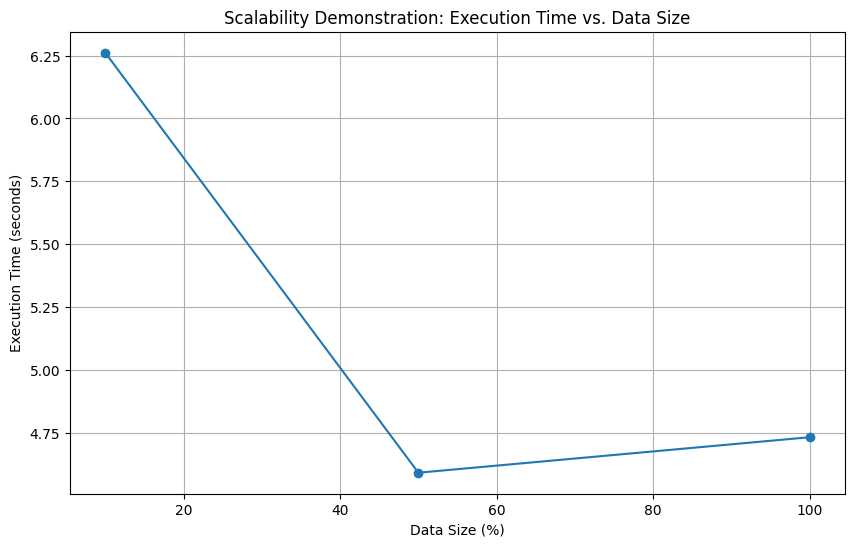

In [ ]:
import matplotlib.pyplot as plt

# Extract execution times and sample fractions
sample_fractions = list(execution_times.keys())
times = list(execution_times.values())

# Create corresponding data size percentages
data_size_percentages = [fraction * 100 for fraction in sample_fractions]

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(data_size_percentages, times, marker='o')

# Add labels and title
plt.xlabel("Data Size (%)")
plt.ylabel("Execution Time (seconds)")
plt.title("Scalability Demonstration: Execution Time vs. Data Size")

# Add grid
plt.grid(True)

# Display the plot
plt.show()

In [ ]:
# Stop the SparkSession
spark.stop()
print("SparkSession stopped.")

# Remove the dummy large dataset CSV file
import os
if os.path.exists('large_dataset.csv'):
    os.remove('large_dataset.csv')
    print("Dummy dataset file 'large_dataset.csv' removed.")
else:
    print("Dummy dataset file 'large_dataset.csv' not found.")

SparkSession stopped.
Dummy dataset file 'large_dataset.csv' removed.


# 1.2- DELIVERABLE: A SCRIPT OR NOTEBOOK WITH INSIGHTS DERIVED FROM BIG DATA PROCESSING.

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [ ]:
df=pd.read_csv('/content/sample_data/california_housing_train.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


# EDA and Insights


In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0
16999,-124.35,40.54,52.0,1820.0,300.0,806.0,270.0,3.0147,94600.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [ ]:
df.shape

(17000, 9)

In [ ]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
16995,False
16996,False
16997,False
16998,False


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.count()

,0
longitude,17000
latitude,17000
housing_median_age,17000
total_rooms,17000
total_bedrooms,17000
population,17000
households,17000
median_income,17000
median_house_value,17000
